In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Deck():
    """ Create a deck class """
    
    suits = ["C", "D", "H", "S"]
    values = [2, 3, 4, 5, 6, 7, 8, 9, 10, "J", "Q", "K", "A"] 
    def __init__(self, number=1, suits=suits, values=values):
        self.num_decks = number
        # We don't need the suits for Black Jack
        self.deck = [i for i in values for j in suits for k in range(number)]
        
    def shuffle_deck(self):
        np.random.shuffle(self.deck)
        
    def deal(self):
        return self.deck.pop(0)

In [3]:
test_deck = Deck(2)
test_deck.deck[:5]

[2, 2, 2, 2, 2]

In [4]:
test_deck.shuffle_deck()
test_deck.deck[:5]

['K', 6, 'Q', 6, 9]

In [5]:
test_deck.deal()

'K'

In [6]:
test_deck.deck[:5]

[6, 'Q', 6, 9, 7]

In [7]:
class play_blackjack():
    """ Play a game of blackjack with just the dealer and one player """
    def __init__(self):
        self.deck = Deck(8)
        
    def play(self):
        self.deck.shuffle_deck()
        self.dealer_hand = []
        self.player_hand = []
        self.dealer_hand.append(self.deck.deck.pop(0))
        self.player_hand.append(self.deck.deck.pop(0))
        self.dealer_hand.append(self.deck.deck.pop(0))
        self.player_hand.append(self.deck.deck.pop(0))
        
    def hit(self, hand):
        hand.append(self.deck.deck.pop(0))

In [13]:
game = play_blackjack()
game.play()

In [14]:
game.dealer_hand

['Q', 'Q']

In [15]:
game.player_hand

[7, 4]

In [16]:
game.hit(game.player_hand)
game.player_hand

[7, 4, 10]

In [36]:
def get_points(hand):
    
    # We want to track how the Ace was counted, if any
    # Whether it was a 1 or 11
    # So we want a tuple of (points, Ace_value)
    points = (0, 0)
    
    # replicate the original list
    cards = [i for i in hand]
    
    # If there's an Ace in the hand, take it out first
    # And count how many Aces there are
    has_A = 0
    while "A" in cards:
        has_A += 1
        cards.remove("A")
        
    # Get total points for all other cards
    try:
        if len(cards) > 0:
            for i in cards:
                try:
                    points = (points[0] + int(i), 0)
                except:
                    points = (points[0] + 10, 0)
    except:
        print (cards)
        print (type(cards))
    # Deal with the Ace if there was at least one
    
    for i in range(has_A):
        if type(points) == tuple:
            if points[0] + 11 <= 21:
                points = [(points[0] + 11, 11), (points[0] + 1, 1)]
            else:
                points = [(points[0] + 1, 1)]
        else:
            new_points = []
            for j in points:
                if j[0] + 11 <= 21:
                    new_points.extend([(j[0] + 11, 11), (j[0] + 1, 1)])
                else:
                    new_points.extend([(j[0] + 1, 1)])
            points = new_points
    
    # Now, points could be a list of tuples or a tuple
    if type(points) == list:
        # Sort the list by number of points in descending order
        points.sort(reverse=True)
        new_points = [i for i in points if i[0] <= 21]
        
        try:
            if len(new_points) == 0:
                # if there are no items in new_points
                # return the smallest item
                return points[-1]
            else:
                return new_points[0]
        except:
            print (new_points)
            print (type(new_points))
    else:
        return points

In [37]:
get_points(["A", "K", 9, 9])

(29, 1)

In [94]:
def simulate_game(strategy="random"):
    game = play_blackjack()
    game.play()
    dealer_open, dealer_closed = game.dealer_hand
    player_card_one, player_card_two = game.player_hand
    dealer_original = get_points(game.dealer_hand)[0]
    player_original = get_points(game.player_hand)[0]
    
    dealer_hit = 0
    # Check if the dealer needs to hit
    dealer = game.dealer_hand
    # Dealer hits below 17
    while get_points(dealer)[0] < 17:
        game.hit(dealer)
        dealer_hit += 1
    
    # If dealer is at 17, check if it's a soft 17
    # if yes, hit

    if "A" in dealer and get_points(dealer)[0] <= 17:
        game.hit(dealer)
        dealer_hit += 1
    
    player_hit = 0
    player = game.player_hand
    
    # Change dealer_open to numerical
    if dealer_open in ["J", "Q", "K"]:
        dealer_open = 10
    elif dealer_open == "A":
        dealer_open = get_points(dealer)[1]
        
    if strategy == "random":
        # Randomize it for the player
        while get_points(player)[0] < 21:
            if np.random.random() <= 0.5:
                game.hit(player)
                player_hit += 1
            else:
                break
    elif strategy == "recommended":
        # From lasvegas-how-to.com
        # Stand on a hand of 17 or more 
        # Never hit on 12, 13, 14, 15 or 16 when the dealer is showing 16 or less
        # Always split 8's
        # Double down on 11 if dealer is showing 17 or less
        if dealer_open < 7:
#             print (get_points(player)[0])
            while get_points(player)[0] < 12:
                game.hit(player)
#                 print (player)
                player_hit += 1
        else:
            while get_points(player)[0] < 17:
                game.hit(player)
                player_hit += 1
        
    dealer_final = get_points(dealer)[0]
    player_final = get_points(player)[0]
    
    dealer_busts = dealer_final > 21
    player_busts = player_final > 21
    
    
    player_wins = dealer_busts or (player_final > dealer_final and not player_busts)
    
    
    
    return [dealer_open, dealer_closed, dealer_original, dealer_hit, dealer_final, int(dealer_busts), 
            player_card_one, player_card_two, player_original, player_hit, player_final, int(player_busts), int(player_wins)]

In [69]:
random_strategy_wins = [sum([simulate_game()[-1] for _ in range(1000)]) for _ in range(10000)]

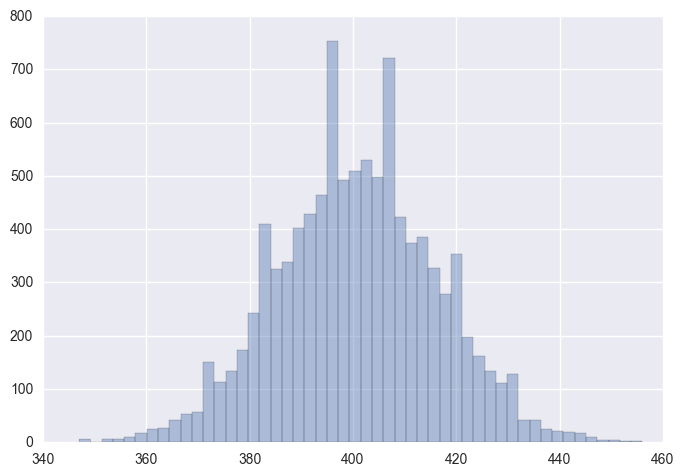

In [72]:
sns.distplot(random_strategy_wins, kde=False);
plt.show();

In [95]:
rec_strategy_wins = [sum([simulate_game(strategy="recommended")[-1] for _ in range(1000)]) for _ in range(10000)]

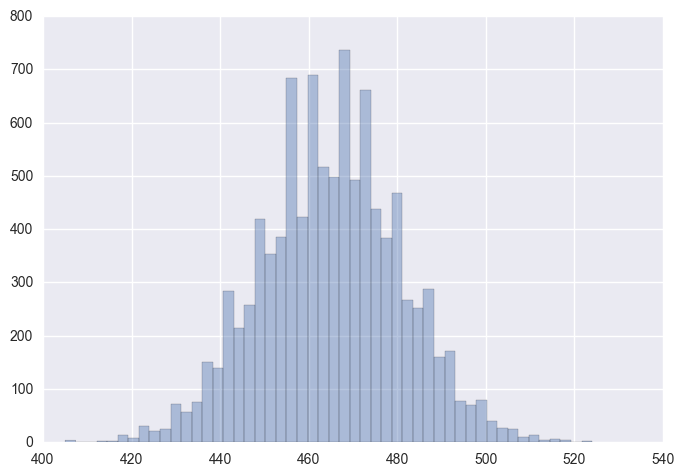

In [96]:
sns.distplot(rec_strategy_wins, kde=False);
plt.show();

In [63]:
df = pd.DataFrame([simulate_game() for _ in range(100000)], columns=["dealer_open", "dealer_closed", 
                                                                               "dealer_original", "dealer_hit", 
                                                                               "dealer_final", "dealer_busts", 
                                                                               "player_card_one", "player_card_two", 
                                                                               "player_original", "player_hit", 
                                                                               "player_final", "player_busts", 
                                                                               "player_wins"])

In [97]:
df.head()

,dealer_open,dealer_closed,dealer_original,dealer_hit,dealer_final,dealer_busts,player_card_one,player_card_two,player_original,player_hit,player_final,player_busts,player_wins
0,6,8,14,1,23,1,Q,6,16,0,16,0,1
1,6,10,16,1,21,0,Q,2,12,1,20,0,0
2,11,K,21,0,21,0,4,Q,14,0,14,0,0
3,2,7,9,2,19,0,7,9,16,2,28,1,0
4,7,9,16,1,18,0,Q,K,20,0,20,0,1


In [100]:
dealer_hands = pd.pivot_table(df, index=["dealer_open", "dealer_closed"], values=["dealer_busts", "player_wins"], aggfunc=[len, sum])
dealer_hands.reset_index(inplace=True)
dealer_hands.head()

dealer_open dealer_closed          len                      sum            
                            dealer_busts player_wins dealer_busts player_wins
0           1             2          323         323          172         196
1           1             3          359         359          183         215
2           1             4          369         369          212         236
3           1             5          404         404          237         261
4           1             6          435         435            0         164

In [99]:
player_hands = pd.pivot_table(df, index=["player_card_one", "player_card_two"], values=["player_busts", "player_wins"], aggfunc=sum)
player_hands.reset_index(inplace=True)
player_hands.head()

,player_card_one,player_card_two,player_busts,player_wins
0,2,2,62,197
1,2,3,89,167
2,2,4,76,194
3,2,5,79,201
4,2,6,93,193
